In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from matplotlib import style
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sb
import warnings
from sklearn.datasets import load_iris
from icecream import ic


In [2]:
warnings.filterwarnings("ignore")

## Let's do ETL:

In [3]:
df = pd.read_csv("Assets/Titanic_Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.308265,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.720846,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,-5.491899,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.993780,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=["Cabin"], inplace=True) #drop columns which have null values as it will create issues in prediction
ic(df)

ic| df:      PassengerId  Survived  Pclass  \
        0              1         0       3   
        1              2         1       1   
        2              3         1       3   
        3              4         1       1   
        4              5         0       3   
        ..           ...       ...     ...   
        886          887         0       2   
        887          888         1       1   
        888          889         0       3   
        889          890         1       1   
        890          891         0       3   
        
                                                          Name     Sex        Age  \
        0                              Braund, Mr. Owen Harris    male  22.000000   
        1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
        2                               Heikkinen, Miss. Laina  female  26.000000   
        3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
        4     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.494303,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
# Forward fill the 'Score' column
df['Embarked'] = df['Embarked'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
x_cols = ["PassengerId","Pclass","Sex","SibSp","Parch","Ticket","Fare","Embarked","Age"] 

In [10]:
X = df[x_cols]
X.head()  #These are features which we will use 

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,1,3,male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,female,1,0,PC 17599,71.2833,C,38.0
2,3,3,female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,female,1,0,113803,53.1000,S,35.0
4,5,3,male,0,0,373450,8.0500,S,35.0


In [11]:
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex']).astype(float)

In [12]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,1,3,1.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,0.0,1,0,PC 17599,71.2833,C,38.0
2,3,3,0.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,0.0,1,0,113803,53.1000,S,35.0
4,5,3,1.0,0,0,373450,8.0500,S,35.0


In [13]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [14]:
X['Embarked'] = label_encoder.fit_transform(X["Embarked"]).astype(float)

In [15]:
X.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,1,3,1.0,1,0,A/5 21171,7.2500,2.0,22.0
1,2,1,0.0,1,0,PC 17599,71.2833,0.0,38.0
2,3,3,0.0,0,0,STON/O2. 3101282,7.9250,2.0,26.0
3,4,1,0.0,1,0,113803,53.1000,2.0,35.0
4,5,3,1.0,0,0,373450,8.0500,2.0,35.0


In [18]:
X = X.drop("PassengerId",axis = 1)

In [19]:
X

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,1.0,1,0,7.2500,2.0,22.000000
1,1,0.0,1,0,71.2833,0.0,38.000000
2,3,0.0,0,0,7.9250,2.0,26.000000
3,1,0.0,1,0,53.1000,2.0,35.000000
4,3,1.0,0,0,8.0500,2.0,35.000000
...,...,...,...,...,...,...,...
886,2,1.0,0,0,13.0000,2.0,27.000000
887,1,0.0,0,0,30.0000,2.0,19.000000
888,3,0.0,1,2,23.4500,2.0,23.494303
889,1,1.0,0,0,30.0000,0.0,26.000000


In [20]:
X['Age'] = X['Age'].astype(int)
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,1.0,1,0,7.2500,2.0,22
1,1,0.0,1,0,71.2833,0.0,38
2,3,0.0,0,0,7.9250,2.0,26
3,1,0.0,1,0,53.1000,2.0,35
4,3,1.0,0,0,8.0500,2.0,35


### Let's Split the data in features and target:

In [22]:
correlation_matrix = X[["Pclass","Sex","SibSp","Parch","Fare","Embarked","Age"]].corr()
correlation_matrix

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
Pclass,1.000000,0.131900,0.083081,0.018443,-0.549500,0.168430,-0.405651
Sex,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.113807,0.117251
SibSp,0.083081,-0.114631,1.000000,0.414838,0.159651,0.070111,-0.378962
Parch,0.018443,-0.245489,0.414838,1.000000,0.216225,0.041732,-0.218499
Fare,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.228364,0.092206
Embarked,0.168430,0.113807,0.070111,0.041732,-0.228364,1.000000,-0.025583
Age,-0.405651,0.117251,-0.378962,-0.218499,0.092206,-0.025583,1.000000


In [25]:
correlation_matrix_2d = correlation_matrix.values
correlation_matrix_2d

array([[ 1.        ,  0.13190049,  0.08308136,  0.01844267, -0.54949962,
         0.16843038, -0.40565131],
       [ 0.13190049,  1.        , -0.11463081, -0.24548896, -0.18233283,
         0.11380677,  0.11725079],
       [ 0.08308136, -0.11463081,  1.        ,  0.4148377 ,  0.15965104,
         0.07011137, -0.37896189],
       [ 0.01844267, -0.24548896,  0.4148377 ,  1.        ,  0.21622494,
         0.04173192, -0.21849862],
       [-0.54949962, -0.18233283,  0.15965104,  0.21622494,  1.        ,
        -0.22836358,  0.09220611],
       [ 0.16843038,  0.11380677,  0.07011137,  0.04173192, -0.22836358,
         1.        , -0.02558312],
       [-0.40565131,  0.11725079, -0.37896189, -0.21849862,  0.09220611,
        -0.02558312,  1.        ]])

In [26]:
correlation_matrix_2d.shape

(7, 7)

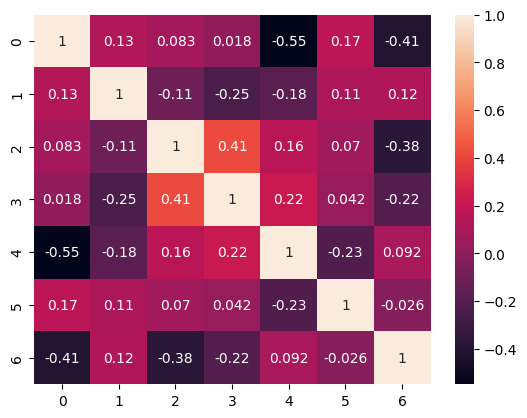

In [27]:
sb.heatmap(correlation_matrix_2d, annot= True)
plt.show()

- Let's try it with all column once then will drop some and try if it effects prediction because as I think Age is an important but corr() is showing negative trend for it

In [29]:
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,3,1.0,1,0,7.2500,2.0,22
1,1,0.0,1,0,71.2833,0.0,38
2,3,0.0,0,0,7.9250,2.0,26
3,1,0.0,1,0,53.1000,2.0,35
4,3,1.0,0,0,8.0500,2.0,35


In [110]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(X)


array([[-1.73010796,  0.73769513, -0.50244517,  0.58904489, -0.5329387 ],
       [-1.72622007, -1.35557354,  0.78684529, -1.93421952,  0.63382512],
       [-1.72233219, -1.35557354, -0.48885426,  0.58904489, -0.24124774],
       ...,
       [ 1.72233219, -1.35557354, -0.17626324,  0.58904489, -0.42397003],
       [ 1.72622007,  0.73769513, -0.04438104, -1.93421952, -0.24124774],
       [ 1.73010796,  0.73769513, -0.49237783, -0.67258731,  0.19628869]])

In [30]:
y = df["Survived"]

In [31]:
X.shape

(891, 7)

In [32]:
y.shape

(891,)

In [33]:
y.isnull().sum() #no null values for y

0

### Let's split data into testing and training

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [35]:
X_train.shape

(623, 7)

In [37]:
lr = LogisticRegression()

In [38]:
lr1 = LogisticRegression(multi_class = "ovr")

In [39]:
lr2 = LogisticRegression(multi_class = "multinomial")

In [40]:
lr.fit(X_train, y_train)

LogisticRegression()

In [41]:
lr1.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [42]:
lr2.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [43]:
pred = lr.predict(X_test)

In [44]:
pred1 = lr1.predict(X_test)

In [45]:
pred2 = lr2.predict(X_test)

In [46]:
accuracy_score(y_test,pred)

0.8171641791044776

In [47]:
accuracy_score(y_test,pred1)

0.8171641791044776

In [48]:
accuracy_score(y_test,pred2) 

0.8134328358208955

In [49]:
np.where(y_test!=pred1)

(array([  5,  15,  19,  24,  29,  33,  40,  50,  59,  61,  71,  72,  77,
         81,  82,  87,  89,  92, 105, 112, 113, 114, 120, 127, 130, 133,
        143, 145, 157, 158, 161, 163, 179, 190, 198, 200, 201, 204, 211,
        213, 217, 224, 228, 233, 245, 246, 255, 257, 258], dtype=int64),)

In [65]:
for idx in mismatched_indices[0]:
    print(f"Index: {idx}, y_test: {y_test[idx]}, pred1: {pred1[idx]}")


Index: 5, y_test: 1, pred1: 0
Index: 15, y_test: 0, pred1: 1
Index: 19, y_test: 1, pred1: 0
Index: 24, y_test: 0, pred1: 1
Index: 29, y_test: 0, pred1: 1
Index: 33, y_test: 1, pred1: 0
Index: 40, y_test: 1, pred1: 0
Index: 50, y_test: 1, pred1: 0
Index: 59, y_test: 1, pred1: 0
Index: 61, y_test: 0, pred1: 1
Index: 71, y_test: 1, pred1: 0
Index: 72, y_test: 0, pred1: 1
Index: 77, y_test: 0, pred1: 1
Index: 81, y_test: 1, pred1: 0
Index: 82, y_test: 0, pred1: 1
Index: 87, y_test: 1, pred1: 0
Index: 89, y_test: 0, pred1: 1
Index: 92, y_test: 1, pred1: 0
Index: 105, y_test: 1, pred1: 0
Index: 112, y_test: 1, pred1: 0
Index: 113, y_test: 0, pred1: 1
Index: 114, y_test: 1, pred1: 0
Index: 120, y_test: 1, pred1: 0
Index: 127, y_test: 1, pred1: 0
Index: 130, y_test: 0, pred1: 1
Index: 133, y_test: 0, pred1: 1
Index: 143, y_test: 0, pred1: 1
Index: 145, y_test: 0, pred1: 1
Index: 157, y_test: 1, pred1: 0
Index: 158, y_test: 0, pred1: 1
Index: 161, y_test: 1, pred1: 0
Index: 163, y_test: 1, pred

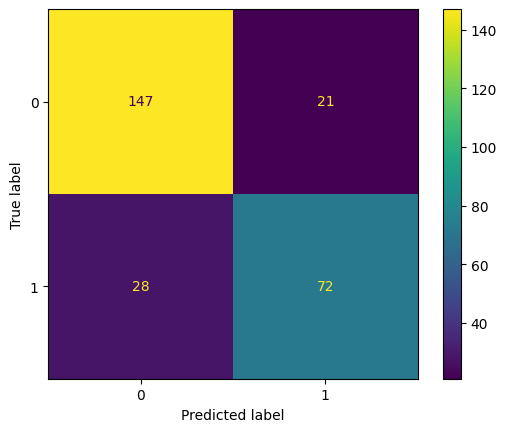

In [70]:
cm = confusion_matrix(y_test, pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [71]:
training_accuracy = lr.score(X_train, y_train)  # Accuracy on training data
print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.81


In [72]:
testing_accuracy = lr.score(X_test, y_test)  # Accuracy on testing data
print(f"Testing Accuracy: {testing_accuracy:.2f}")

Testing Accuracy: 0.82


In [73]:
#Model is showing 82 percent no underfitting or overfitting.